<a href="https://colab.research.google.com/github/yoon0416/python/blob/main/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

**와인 데이터 확인**

In [ ]:
from sklearn.datasets import load_wine # Changed 'sklenarn' to 'sklearn'
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

**특성 간 상관관계와 레이블 분포 시각화**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

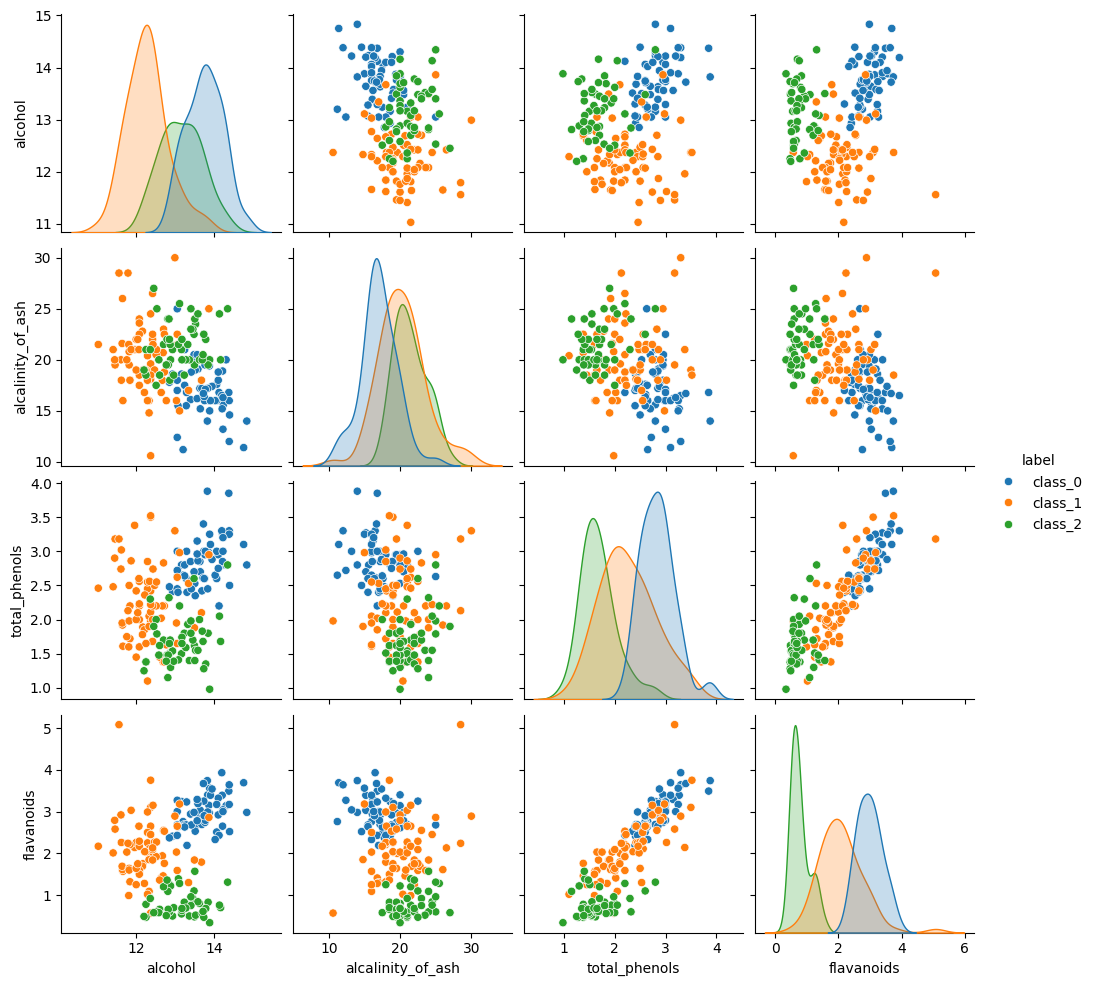

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

df_analysis = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_class = pd.Series(wine.target, dtype="category")
wine_class = wine_class.cat.rename_categories(wine.target_names)
df_analysis["label"] = wine_class

# 컬럼 이름 'alcalinity_of_ahs'를 'alcalinity_of_ash'로 수정
sns.pairplot(vars=['alcohol', 'alcalinity_of_ash', 'total_phenols', 'flavanoids'], hue='label', data=df_analysis)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd # pandas 임포트 추가

# 'df_wine'을 'df_analysis'로 변경
df_wine_proc = df_analysis.drop(labels=['alcalinity_of_ash', 'total_phenols', 'proanthocyanins'], axis=1)

# 'label' 컬럼을 숫자형으로 변환 (0, 1, 2)
# wine.target에서 원래 클래스 값을 가져와 사용
df_wine_proc['label'] = wine.target

# sklearn.model_selection에서 train_test_split 사용
train, test = train_test_split(df_wine_proc, test_size=0.3, random_state=0, stratify=df_wine_proc['label'])

train_X = train[train.columns[:10]]
train_Y = train[train.columns[10:]]
test_X = test[test.columns[:10]]
test_Y = test[test.columns[10:]]

model = RandomForestClassifier(n_estimators=3)
model.fit(train_X, train_Y.values.ravel())  # fit을 위해 target 변수를 Ravel
pred_RF = model.predict(test_X)

# sklearn에서 metrics 사용
print('랜덤 포레스트 알고리즘 분류 정확도: ', metrics.accuracy_score(pred_RF, test_Y))

랜덤 포레스트 알고리즘 분류 정확도:  0.9444444444444444


# **통계 기반 예측**

- 자기회귀(AR) 모형: 데이터의 과거 값들을 선형으로 조합 미래값 예측하는 모형

  ㄴ 10장의 회귀 분석과 같이 과거의 값 전부가 현재의 값에 영향을 미침


- 이동평균(MA) 모형: 데이터가 어떤 방향성을 가지고 증가 or 감소할 때, 데이터가 이동할 때마다 평균을 구하여 예측에 활용하는 모형


- AMRA 모형: AR 모형과 MA모형을 결합한 모형

 ㄴ현재에서 과거 특정 시점까지의 데이터 전부에다가 증가 or 감소 추세까지 전부 반영하여 예측

**AR, MA, ARMA 모형 모두 정상성 시계열 데이터를 전제로 사용 가능**

☆ 반드시 데이터를 차분하거나 변환하여 정상성을 확보한 후에 학습 및 예측을 진행

# **ARIMA**
- AR과 MA가 결합한 점은 ARMA와 동일, 비정상성 데이터를 차분하여 예측하도록 지원
- 사용할 때 사전에 데이터 변환 또는 차분을 수행할 필요 없음, 모형에 최적의 차분 계수 또는 변환 방법을 입력하면 됨

# **ARIMA 모형을 이용하는 예측**

In [ ]:
import pandas as pd
import yfinance as yf

tsla = yf.download('TSLA', start = '2021-11-01', end='2023-03-31')
df_tsla = pd.DataFrame(tsla['Close'])
df_tsla.head

[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of                  Close
Date                  
2021-11-01  402.863342
2021-11-02  390.666656
2021-11-03  404.619995
2021-11-04  409.970001
2021-11-05  407.363342
...                ...
2023-03-24  190.410004
2023-03-27  191.809998
2023-03-28  189.190002
2023-03-29  193.880005
2023-03-30  195.279999

[355 rows x 1 columns]>

 인덱스 가공


In [ ]:
df_tsla = df_tsla.reset_index() #reset_index() 함수로 인덱스를 초기화 함, df_tsla의 인덱스는 0부터 시작하는 정수
df_tsla.columns = ['date', 'value'] #각 열에 열 이름을 date와 value를 부여
df_tsla['data'] = pd.to_datetime(df_tsla['date']) #date 열을 파이썬의 날짜 및 시간 형식인 datetime으로 변환
df_tsla.head()

,date,value,data
0,2021-11-01,402.863342,2021-11-01
1,2021-11-02,390.666656,2021-11-02
2,2021-11-03,404.619995,2021-11-03
3,2021-11-04,409.970001,2021-11-04
4,2021-11-05,407.363342,2021-11-05


# **학습 데이터와 테스트 데이터 분활**

과거 데이터를 데이터 프레임 df_tsla_train으로 저장

최근 순으로 20%는 테스트 데이터로 정함 데이터 프레임 df_tsla_test로 저장



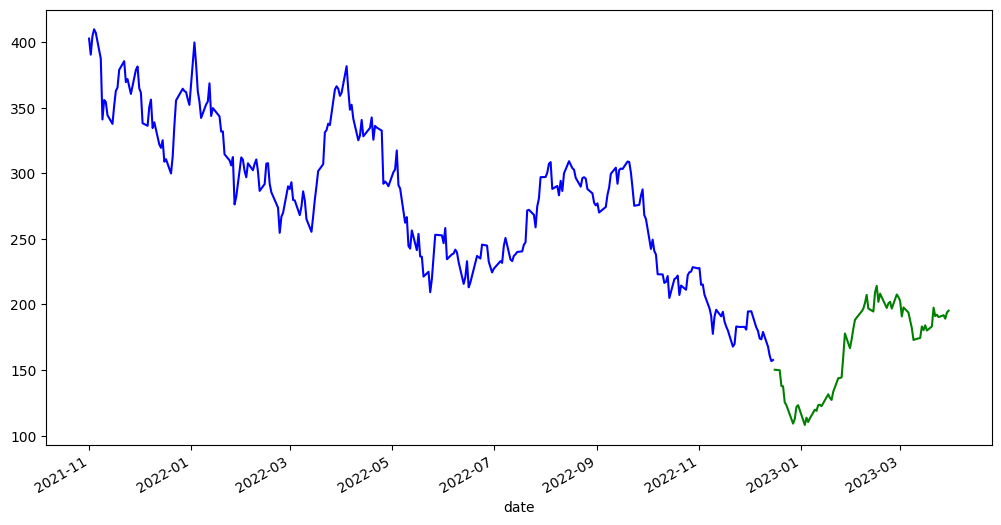

In [ ]:
import matplotlib.pyplot as plt

#데이터 분활하기
df_tsla_train = pd.DataFrame(df_tsla['value'][:int(0.8*len(df_tsla))])
df_tsla_test = pd.DataFrame(df_tsla['value'][int(0.8*len(df_tsla)):])
df_tsla_train['date'] = df_tsla['date'][:int(0.8*len(df_tsla))]
df_tsla_test['date'] = df_tsla['date'][int(0.8*len(df_tsla)):]
df_tsla_train.set_index('date', inplace=True)
df_tsla_test.set_index('date', inplace=True)

df_tsla_train['value'].plot(figsize=(12.2, 6.4), color = 'blue')
df_tsla_test['value'].plot(color = 'green')

plt.show()

- 예측 모형이 2021-11-01 ~ 2022-12-15 까지의 데이터 학습
- 2022-12-16 ~ 2023-03-30 까지 주가 예측

# **차분 횟수 확인**

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.0 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import ndiffs, nsdiffs
print(f"최적의 차분 횟수(ADF): {ndiffs(df_tsla_train, test ='adf')}")
print(f"최적의 차분 횟수(KPSS): {ndiffs(df_tsla_train, test ='kpss')}")
print(f"최적의 차분 횟수(PP): {ndiffs(df_tsla_train, test ='pp')}")

최적의 차분 횟수(ADF): 1
최적의 차분 횟수(KPSS): 1
최적의 차분 횟수(PP): 1


# **계절성 확인**

In [ ]:
print(f"최적의 차분 계수 (0SCB): {nsdiffs(df_tsla_train, m=12, test='ocsb')}")
print(f"최적의 차분 계수 (CH): {nsdiffs(df_tsla_train, m=12, test='ch')}")

최적의 차분 계수 (0SCB): 0
최적의 차분 계수 (CH): 0


- m = 12로 지정하여 OCSB 알고리즘으로 검정한 결과 최적의 차분 계수가 0이므로 계절성이 없음
- CH 알고리즘으로 검정한 결과도 계절성이 없음

* 따라서 테슬라 데이터에서는 계절성이 검출되지 않음


# **ARIMA 모형 탐색**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

n_diffs = 1
model_fit = pm.auto_arima(
    y = df_tsla_train['value'],
    d = n_diffs,
    start_p=0, max_p=2,
    start_q=0, max_q=2,
    m=1,seasonal=False, #데이터 계절성이 없음
    stepwise = True,
    trace=True)
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2197.802, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2199.194, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2199.177, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2197.357, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2200.676, Time=0.53 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.116 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1097.679
Date:                Thu, 10 Oct 2024   AIC                           2197.357
Time:                        16:35:49   BIC                           2201.003
Sample:                             0   HQIC                          2198.819
                                - 284                                       

- 아까 찾은 최적의 차분 횟수 n_diffs 값만 입력하면 pmdarima의 auto_arima()함수가 자동으로 모형 생성을 반복하면서 최적의 모형을 도출
- ARIMA(0,1,0) 모형이 주어진 데이터와 가장 적합한 모형으로 판별

# **최적 ARIMA 모형으로 예측**
- Ljung-Box(Q)은 p-값이 0.05보다 클 때 대립가설을 채택하는 통계량이므로 0.61은 유의한 범위
- 비대칭도(skew)가 0에 가까울수록, 첨도(Kurtosis)가 3에 가까울수록 최적으로 생성되는 모형

In [ ]:
tsla_pred =model_fit.predict(n_periods=len(df_tsla_test))
df_tsla_pred = pd.DataFrame(tsla_pred)

result = pd.DataFrame(df_tsla_test['value'].values, index = df_tsla_test.index, columns = ['value'])
result

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,value
date,
2022-12-16,150.229996
2022-12-19,149.869995
2022-12-20,137.800003
2022-12-21,137.570007
2022-12-22,125.349998
...,...
2023-03-24,190.410004
2023-03-27,191.809998
2023-03-28,189.190002


최적으로 생성된 ARIMA모형으로 2022-12-16부터 마지막 날짜까지의 주가를 예측

- 인덱스를 초기화하고 가공하여 재지정
- result는 각 날짜의 예측 주가를 값으로 갖는 데이터 프레임, 열이 하나이므로 시리즈라고 할 수 있음
- 인덱스가 날짜형이기 때문에 날짜를 축으로 그래프를 그리거나 특정 날짜의 데이터를 조회하는 등 활용하기 편리함

# **예측 주가 시각화**

In [ ]:
result.index = df_tsla_test.index
print(result.head())

                 value
date                  
2022-12-16  150.229996
2022-12-19  149.869995
2022-12-20  137.800003
2022-12-21  137.570007
2022-12-22  125.349998


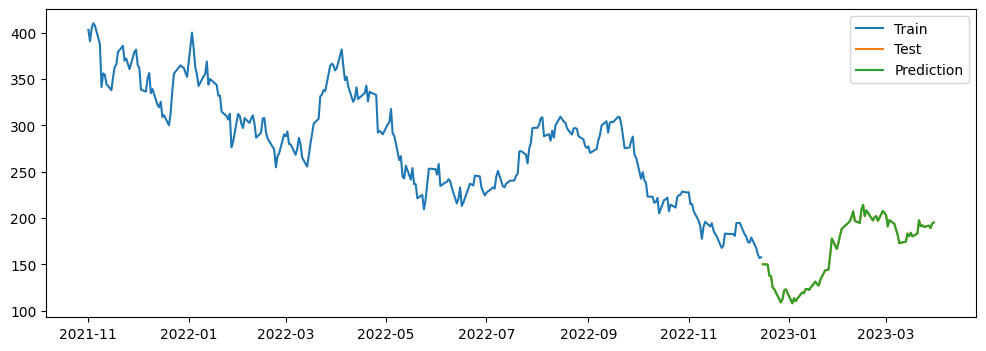

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (12,4))
plt.plot(df_tsla_train, label = 'Train') #훈련 데이터
plt.plot(df_tsla_test, label = 'Test') #테스트 데이터
plt.plot(result, label = 'Prediction') #예측 데이터

plt.legend()
plt.show()

오류: Test 값과 prediction 값이 바뀜 또한 Prediction 값이 차트에 안나옴
바꾸기 귀찮으니 동진이한테 짬때리기

# **시계열 데이터**

- 시간 순서대로 수집하거나 정렬한 순차적인 데이터를 활용하여 미래 시점의 상태를 예측
- 상품의 수요를 예측하여 생산량을 조절, 경제 지표를 바탕으로 주가 예측하는데 적용

# **특징**

- 시계열 예측은 완벽할 수 없으며 변동 가능성이 있음 (과거의 데이터를 바탕으로 미래의 값을 결정하기 때문에)
- 시계열 예측에서는 다변량인 경우가 흔함 (일반적으로 다룰 요인이 많아지면 요인 간 상관관계까지 학습해야함)
- 사계열 데이터는 데이터셋의 구성을 적절히 변형하기 어려움

# **데이터의 정상성**
- **정상성**
- **비정상성**

# **시계열 패턴**

1.   **추세**: 장기적으로 증가하거나 감소하는 패턴
2.   **계절성**: 특정한 시기나 특정요일, 주, 월 등에 반복되는 계절성 요인에 영향을 받는 패턴

        ㄴ ex) 여름철 아이스크림 판매량 증가, 겨울철 감기량 판매량 증가
3. **주기성**: 정해진 양이나 정해진 빈도 없이 값의 증가나 감소되는 패턴


# **시계열 그래프와 정상성**

- 그래프에 지속적인 상승 또는 하락 추세가 없다
- 과거의 변동폭과 현재의 변동폭이 같다
- 계절성이 없다

# **통계적 정상성 검증** :일반적으로 통계기법으로 데이터의 정상성을 검증

**시각적 판단**

- 그래프에 지속적인 상승 또는 하락 추세가 없음
- 과거의 변동폭과 현재의 변동폭이 같음
- 계절성이 없음

**통계적 판단**
- 평균이 일정
- 분산이 시점에 독립적
- 공분산이 시차에 의존적이나 시점에 독립적

In [ ]:
import yfinance as yf #야후 파이낸스 주가 데이터

In [ ]:
tsla = yf.download('TSLA', start = '2018-01-01', end='2022-12-31') #테슬라 주가 로드
tsla

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


# **그래프로 정상성 검증하기**

In [ ]:
import pandas as pd
df_tsla = pd.DataFrame(tsla['Close'])

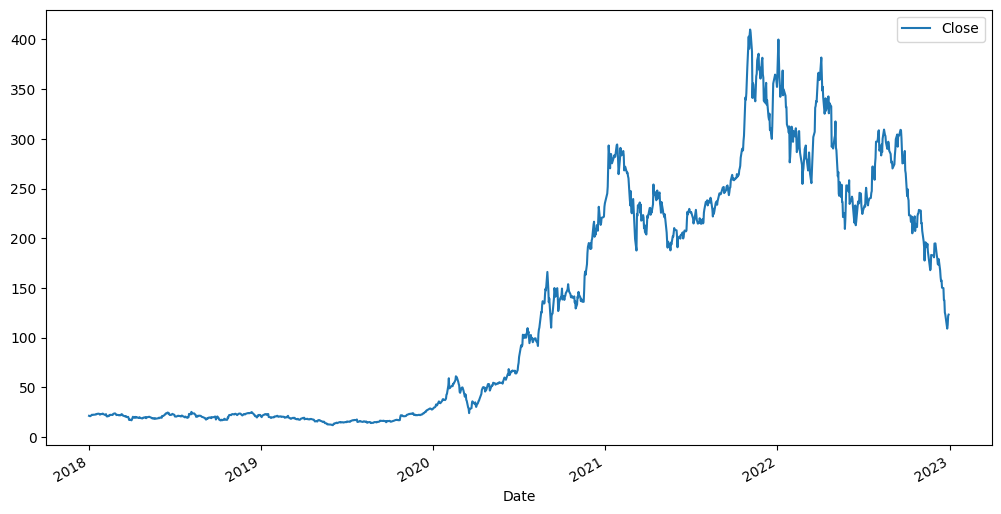

In [ ]:
import matplotlib.pyplot as plt
df_tsla.plot(figsize=(12.2, 6.4)) #테슬라 주가 시각화
plt.show()

# **ADF 검정**